# PART III : As a migrant, if I want to stay and live in Metorpolitan area, but I can't afford expensive property, Where should I consider?

## CONTENT

1. [**DISTRIBUTION OF PRICE?**](#1)
2. [**FEATURE PROPORTION FOR LOWER PRICE AREA?**](#2)
3. [**DISTRIBUTION OF DISTANCE?**](#3)
4. [**PROPORTION FOR DIFFERENT DISTANCE?**](#4)
5. [**CONCLUDE**](#5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

__author__="Ya Yu Chen"
__email__="a725761@gmail.com"

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
raw_df = pd.read_csv('melb_data_with_correct_council.csv')
df = raw_df.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Melbourne,902/16 Liverpool St,1,u,427000,S,Harcourts,3/12/2016,2.8,3000,1,1,0.0,0,NaN,NaN,Melbourne,-37.8111,144.9715,Northern Metropolitan,17496
1,Melbourne,14/2 Exhibition St,2,u,1160500,S,Kay,4/03/2017,2.8,3000,2,2,1.0,4230,NaN,2006.0,Melbourne,-37.8157,144.9727,Northern Metropolitan,17496
2,Melbourne,2306/265 Exhibition St,2,u,780000,SP,Galldon,4/06/2016,2.8,3000,2,2,1.0,0,85.0,1997.0,Melbourne,-37.8095,144.9691,Northern Metropolitan,17496
3,Melbourne,1501/87 Franklin St,2,u,535000,S,HAR,7/05/2016,2.8,3000,2,1,1.0,0,84.0,2001.0,Melbourne,-37.8080,144.9617,Northern Metropolitan,17496
4,Melbourne,3811/80 Abeckett St,2,u,450000,VB,MICM,7/11/2016,2.8,3000,2,1,1.0,0,55.0,2014.0,Melbourne,-37.8091,144.9609,Northern Metropolitan,17496


In [5]:
# Remove properties whih located at Victoria 
df_metro = df.query("Regionname not in ('Northern Victoria', 'Eastern Victoria', 'Western Victoria')")
df_metro.shape

(13454, 21)

<a class="anchor" id="1"></a>
## Examine target

<AxesSubplot:>

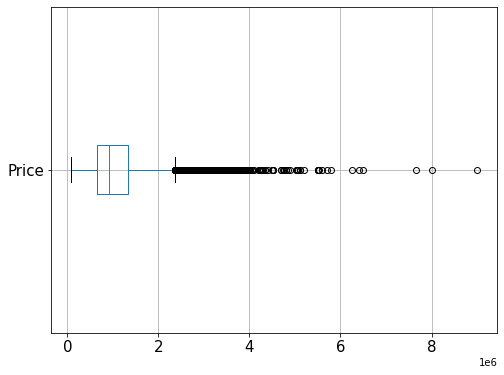

In [7]:
# check target distribution
df_metro.boxplot(column='Price', vert=False, figsize=(8,6), fontsize=15)

### Examine target outliers

In [8]:
# using IQR to examine outliers

quar = df_metro['Price'].describe()
IQR = quar['75%'] - quar['25%']
above_out = quar['75%'] + IQR * 1.5
outlier_df = df_metro[df_metro['Price']>=above_out]
print('Outlier of Price for entire dataset is ${}.'.format(above_out))
print('The number of outliers is {}.'.format(outlier_df.shape[0]))

Outlier of Price for entire dataset is $2362500.0.
The number of outliers is 603.


In [9]:
outlier_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,603.000000,6.030000e+02,603.000000,603.000000,603.000000,603.000000,600.000000,603.000000,350.000000,391.000000,603.000000,603.000000,603.000000
mean,4.053068,3.057845e+06,7.981260,3134.402985,3.990050,2.545605,2.216667,1442.580431,283.074054,1944.713555,-37.844727,145.029295,7493.615257
std,0.841512,7.878527e+05,3.318902,45.121193,0.870273,0.953657,1.112858,17609.446947,187.951314,44.652732,0.046693,0.050080,3195.081796
min,1.000000,2.365000e+06,1.500000,3002.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1854.000000,-37.995080,144.879800,394.000000
25%,4.000000,2.550000e+06,5.500000,3103.000000,3.000000,2.000000,2.000000,551.500000,203.250000,1910.000000,-37.867550,144.999550,5454.000000
50%,4.000000,2.801000e+06,7.800000,3127.000000,4.000000,2.000000,2.000000,696.000000,274.000000,1930.000000,-37.838600,145.031400,7217.000000
75%,5.000000,3.277500e+06,10.300000,3184.500000,4.500000,3.000000,2.000000,840.000000,336.750000,1992.000000,-37.811640,145.065050,10331.000000
max,8.000000,9.000000e+06,21.500000,3207.000000,9.000000,7.000000,8.000000,433014.000000,3112.000000,2017.000000,-37.741700,145.193290,15321.000000


<AxesSubplot:>

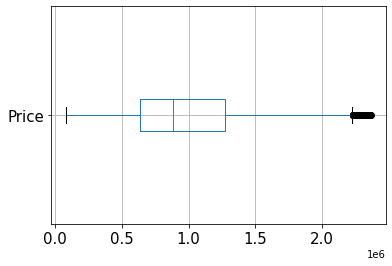

In [10]:
# usinge boxplot to examine Price data which values are below outlier
df_metro[df_metro['Price']<above_out].boxplot(column='Price', vert=False, fontsize=15)

In [11]:
# separate into different subset by 1 million and examine size
less_1m = df_metro[df_metro['Price']<=1000000]
over_1m = df_metro[(df_metro['Price'] < above_out) & (df_metro['Price']>1000000)]
print(less_1m.shape)
print(over_1m.shape)

(7714, 21)
(5137, 21)


<a class="anchor" id="2"></a>
## Boxplot examine Price - Council, Region, Type

<AxesSubplot:title={'center':'Price'}, xlabel='CouncilArea'>

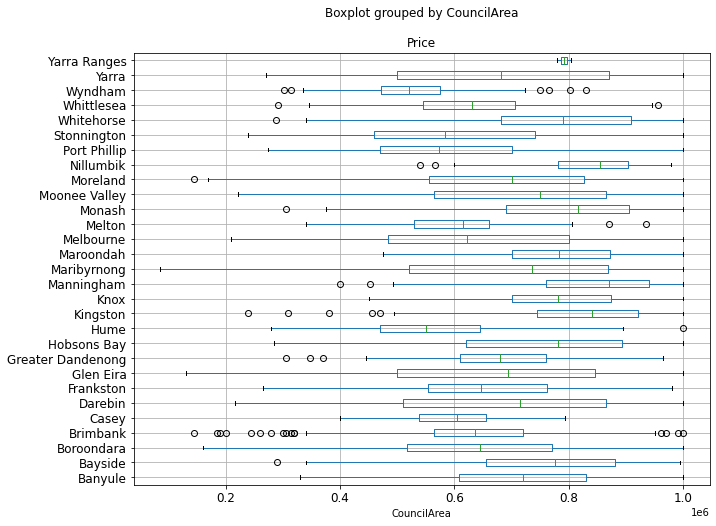

In [12]:
# check features distribution by target
less_1m.boxplot(column='Price', by='CouncilArea', figsize=(10,8), vert=False, fontsize=12)

**MORELAND, MARIBYRNONG, BOROONDARA and GLEN EIRA** has the lowest Price property. **WYNDHAN, STONNINGTON, PORT PHILLIP and HUME** has the median Price which is less than $600000.

<AxesSubplot:title={'center':'Price'}, xlabel='Regionname'>

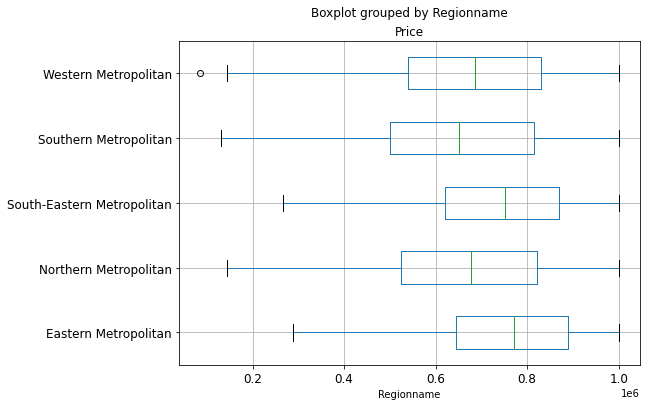

In [13]:
less_1m.boxplot(column='Price', by='Regionname', figsize=(8,6), vert=False, fontsize=12)

**SOUTHERN, WESTERN and NORTHERN** has lower median value than others.

<AxesSubplot:title={'center':'Price'}, xlabel='Type'>

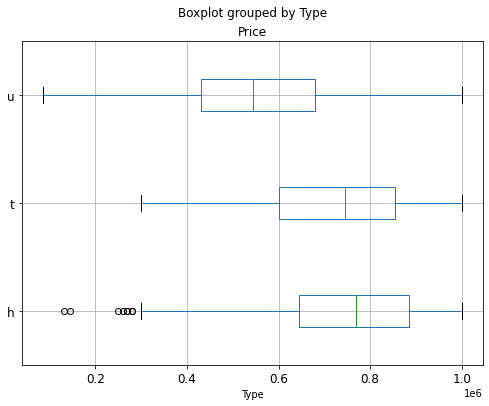

In [14]:
less_1m.boxplot(column='Price', by='Type', figsize=(8,6), vert=False, fontsize=12)

**U type** has lowest median Price value.

<AxesSubplot:title={'center':'Median Price by group features'}, ylabel='Type,CouncilArea,Regionname'>

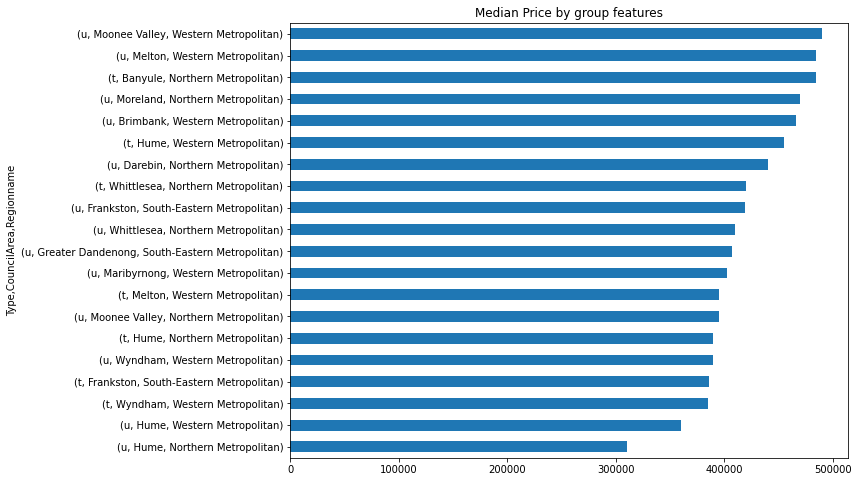

In [15]:
# group by type, council, region and examine the median value of target
# bar chart to reveal the top 20 lowest location and type
tcr_group = less_1m.groupby(by=['Type', 'CouncilArea', 'Regionname'])
tcr_group['Price'].median().sort_values()[:20].plot(kind='barh', figsize=(10,8), title='Median Price by group features')

<a class="anchor" id="3"></a>
## Examine Distance 

<AxesSubplot:>

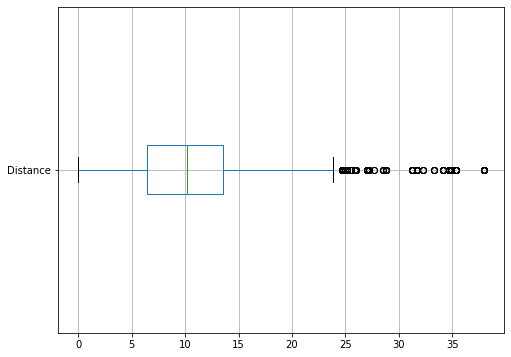

In [16]:
less_1m.boxplot(column='Distance', vert=False, figsize=(8,6))

Median value is around **10**.

In [17]:
# divide data which target value less than 1 million into 2 subsets by median value 10
cl = less_1m.query("Distance <= 10")
fur = less_1m.query("Distance > 10")
print(cl.shape)
print(fur.shape)

(3826, 21)
(3888, 21)


### Distribition by different subsets

<AxesSubplot:title={'center':"Type's distribution by Distance'"}>

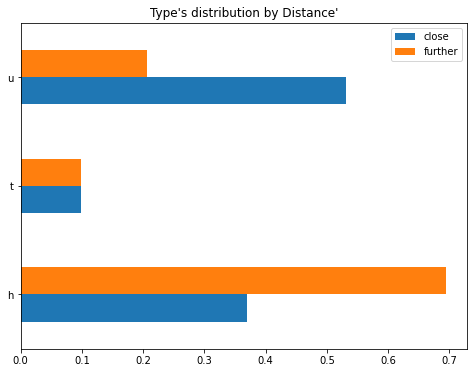

In [18]:
# examine the percentage proportion of each subset by different features
def count_plot(df1, df2, col):
    c1 = df1[col].value_counts()
    c2 = df2[col].value_counts()
    c = pd.DataFrame({'close': c1, 'further': c2})
    return (c/c.sum()).plot(kind='barh', figsize=(8,6), title="{}'s distribution by Distance'".format(col))

count_plot(cl, fur, 'Type')

**CLOSE** Distance has more **U**, **FURTHER** is **H**. Both has **OVER 50%**.

<AxesSubplot:title={'center':"Regionname's distribution by Distance'"}>

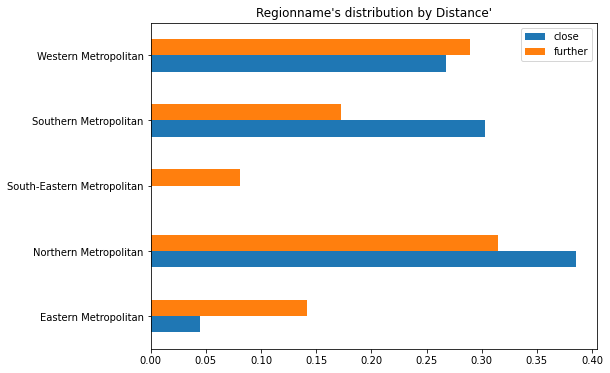

In [19]:
count_plot(cl, fur, 'Regionname')

**NORTHER and SOUTHERN** has more percentage in **CLOSE** subset.

<a class="anchor" id="4"></a>
## Boxplot examine Distance - Council, Region, Type

### Distance less 10

<AxesSubplot:title={'center':'Distance'}, xlabel='Type'>

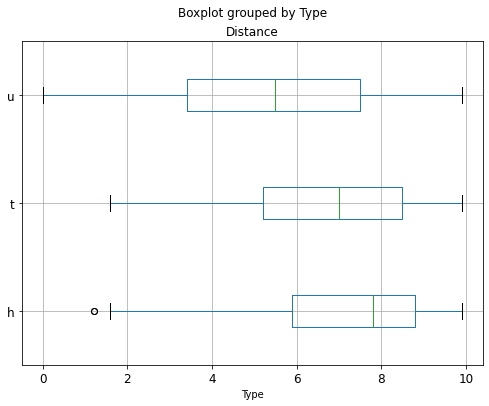

In [20]:
cl.boxplot(column='Distance', by='Type',figsize=(8,6), vert=False, fontsize=12)

**U** has the closest Distance value

<AxesSubplot:title={'center':'Distance'}, xlabel='CouncilArea'>

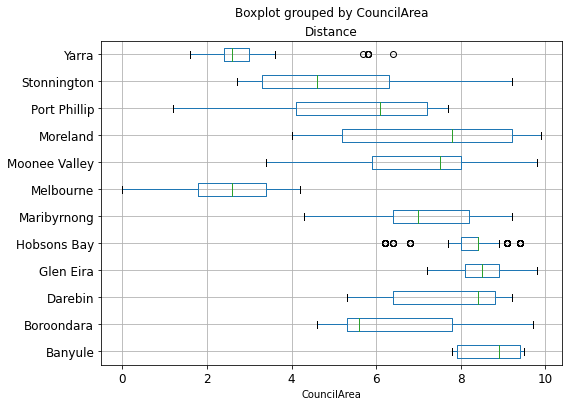

In [21]:
cl.boxplot(column='Distance', by='CouncilArea',figsize=(8,6), vert=False, fontsize=12)

**MELBOURNE and YARRA** are both less than **5**

<AxesSubplot:title={'center':'Distance'}, xlabel='Regionname'>

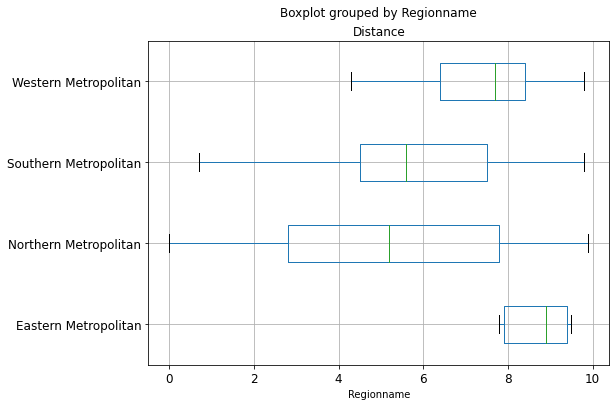

In [22]:
cl.boxplot(column='Distance', by='Regionname',figsize=(8,6), vert=False, fontsize=12)

Distance: **NORTHERN < SOUTHERN < WESTERN < EASTERN**

<AxesSubplot:title={'center':'Median Distance by group features(Closer)'}, ylabel='Type,CouncilArea,Regionname'>

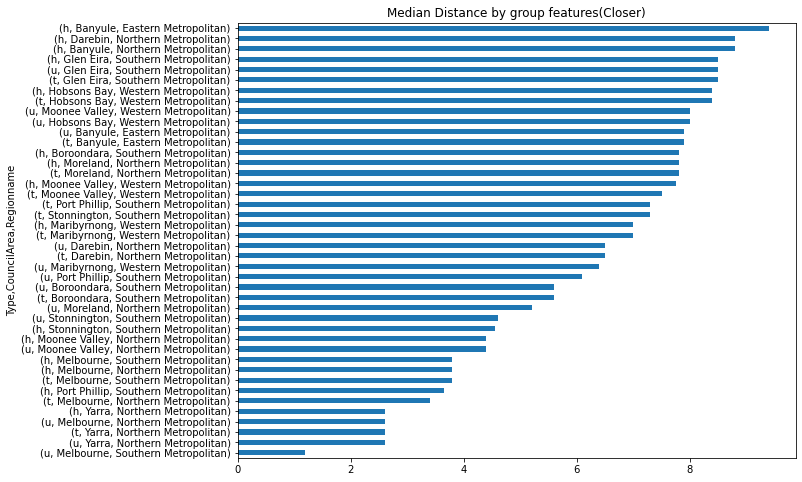

In [23]:
# group by type, council, region and examine the median value of Distance
# bar chart to reveal the top 20 closest location and type
cl_group = cl.groupby(by=['Type', 'CouncilArea', 'Regionname'])
cl_group['Distance'].median().sort_values().plot(kind='barh', figsize=(10,8), title='Median Distance by group features(Closer)')

Only **MELBOURNE and YARRA** has no further than 5.

### Distance over 10

<AxesSubplot:title={'center':'Distance'}, xlabel='Type'>

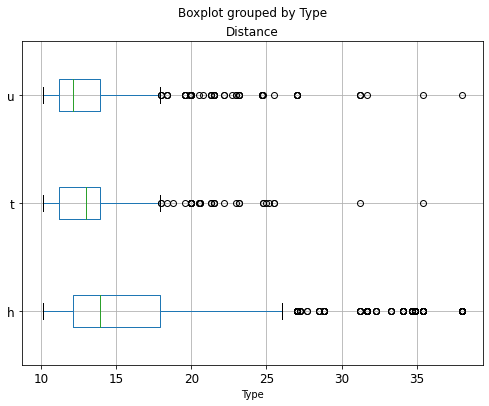

In [24]:
fur.boxplot(column='Distance', by='Type',figsize=(8,6), vert=False, fontsize=12)

**H** is further than others.

<AxesSubplot:title={'center':'Distance'}, xlabel='CouncilArea'>

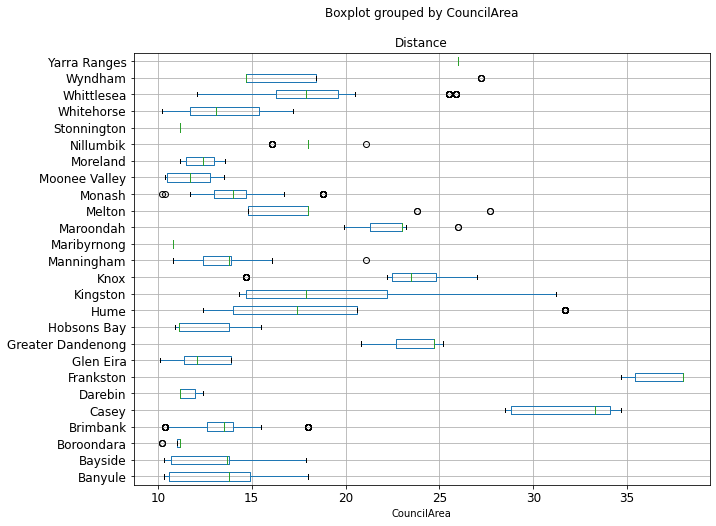

In [25]:
fur.boxplot(column='Distance', by='CouncilArea', vert=False, fontsize=12, figsize=(10,8))

**FRANKSTON, KINGSTON and CASEY** has furtherest values.

<AxesSubplot:title={'center':'Distance'}, xlabel='Regionname'>

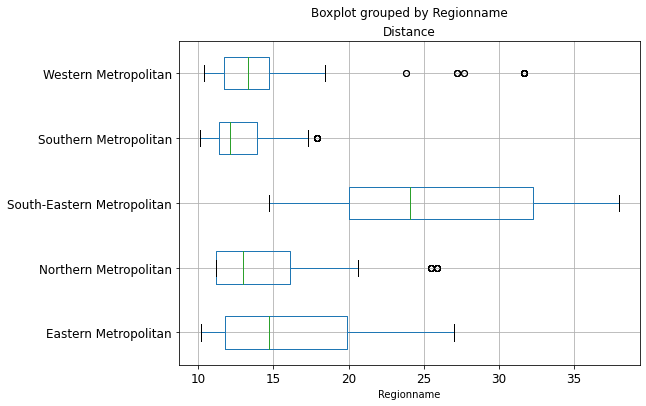

In [26]:
fur.boxplot(column='Distance', by='Regionname',figsize=(8,6), vert=False, fontsize=12)

Median Distance: **SOUTH-EASTERN > EASTERN > WESTERN > NORTHERN > SOUTHERN**

<AxesSubplot:title={'center':'Median Distance by group features(Further)'}, ylabel='Type,CouncilArea,Regionname'>

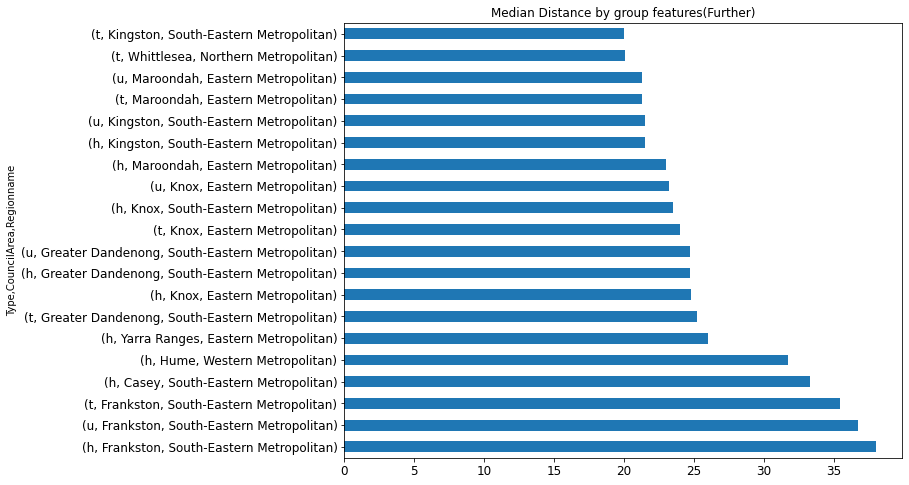

In [27]:
# group by type, council, region and examine the median value of Distance
# bar chart to reveal the top 20 furtherest location and type
fur_group = fur.groupby(by=['Type', 'CouncilArea', 'Regionname'])
fur_group['Distance'].median().sort_values(ascending=False)[:20].plot(kind='barh',fontsize=12, figsize=(10,8), title='Median Distance by group features(Further)')

Only **FRANKSTON and CASEY** has the furtherest distance.

<a class="anchor" id="5"></a>
## Conclude

>**Price**
>>**Region** - **SOUTHERN, NORTHERN and WESTERN** area are **CHEAPER** than others.
>
>>**Council** - **MORELAND, MARIBYRNONG, BOROONDARA and GLEN EIRA** has the lowest Price property. **WYNDHAN, STONNINGTON, PORT PHILLIP and HUME** has the median Price which is less than 600000.
>
>>**Type** - Median target value: **U < T < H**.
>
>**Distance** - Type Distance for both subsets: **U < T < H**
>>**Closer to CBD** 
>>>**Council** - Only **MELBOURNE and YARRA** has Distance values which is less than 5.
>
>>>**Region** - Median Distance value: **N < S < W < E**.
>
>>**Further to CBD**
>>>**Council** - Only **FRANKSTON and CASEY** has median values over 30.
>
>>>**Region** - Median Distance: **SE > E > W > N > S**.
>
**Recommend** : If my budget is below 1 million dollar, accrding to the distribution of Price, **U** type's property which is located in **MORELAND, MARIBYRNONG, BOROONDARA, GLEN EIRA, WYNDHAN, STONNINGTON, PORT PHILLIP and HUME** would be the best option for me, it means that I could have a chance to buy a property which cost 50% of my budget only. If **DISTANCE** is my only concern, then it seems like **MELBOURNE and YARRA** would be the best location which Distance is not further than 5. 